In [1]:
import numpy as np
np.random.seed(7)
from keras.models import load_model
from tools import *
from localizer import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Using TensorFlow backend.


In [3]:
model = load_model('../models/lab_xy2.hdf5')
lab_loc = localizer()
lab_loc.load_profile('lab_profile')
X, y = load_data_from_folder('./datasets', lab_loc.profile, keep_percent=1.0)
# get only the RSSI values
X = X[:,::2]
X = scale_inputs(X)

np.random.seed(7)
p = np.random.permutation(len(X))
X, y = X[p], y[p]
split = int(0.9 * X.shape[0])
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

shape_str = '{:10s} | {:15s} | {:15s}'
print(shape_str.format('', 'X shape', 'y shape'))
print(shape_str.format('TRAIN', str(X_train.shape), str(y_train.shape)))
print(shape_str.format('TEST', str(X_test.shape), str(y_test.shape)))
print(shape_str.format('TOTAL', str(X.shape), str(y.shape)))

Loaded profile: lab_profile


FileNotFoundError: [Errno 2] No such file or directory: './datasets'

In [16]:
color_map_iter = iter(cm.rainbow(np.linspace(0, 1, 9)))
colors = {}
for point in y_train:
    try: 
        colors[str(point)]
    except:
        colors[str(point)] = next(color_map_iter)

*Training Data*

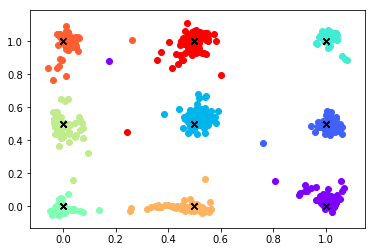

In [17]:
pred_train = model.predict(X_train)
for i, point in enumerate(pred_train):
    color = colors[str(y_train[i])]
    plt.scatter(point[0], point[1], color=color)
    plt.scatter(y_train[i, 0], y_train[i, 1], color='black', marker='x')
plt.show()

*Test Data*

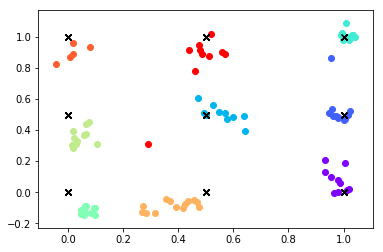

In [13]:
pred_test = model.predict(X_test)
for i, point in enumerate(pred_test):
    color = colors[str(y_test[i])]
    plt.scatter(point[0], point[1], color=color)
    plt.scatter(y_test[i, 0], y_test[i, 1], color='black', marker='x')
    
plt.show()